# Preparing data for Modelling

In [1]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.base import clone

import seaborn as sns

import quantstats as qs
import os 
# pd.set_option('display.max_rows', None)
import os 

# To automatically load changes in different files 
%load_ext autoreload
%autoreload 2


import seaborn as sns 
import matplotlib.pyplot as plt 
# Applying Settings to Viaualization Tools 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
# Set color palette to blue shades
sns.set_palette(["#003366", "#6699CC", "#99CCFF", "#99CCFF"])
sns.set_palette(["#002855", "#3E7EAA", "#82B5D8", "#B3D9F2"])
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_style("darkgrid")

In [8]:
from utils import search_folder
current_dir = os.getcwd()
thesis_folder_path = current_dir.replace("thesis_code", "")
twitter_data_path = search_folder(thesis_folder_path,"twitter_data")
eikon_data_path = search_folder(thesis_folder_path,"eikon_news")
stock_data_path = search_folder(thesis_folder_path,"stock_prices")
modelling_data_path = search_folder(thesis_folder_path,"modelling_data")
google_trending_path = search_folder(thesis_folder_path,"google_search")

In [9]:
def read_modelling(path, name):
    df = pd.read_csv(path+name)
    df["datetime"] = pd.to_datetime(df["datetime"])
    df = df.sort_values(by = "datetime", ascending = True)
    df = df.reset_index(drop = True)
    return df

---
## Stock Data 

In [10]:
stock_data_df = read_modelling(modelling_data_path, "/all_stocks_returns_df.csv")
stock_data_df

,datetime,close,net,ret,open,low,high,volume,turnover_usd,flow,company
0,2017-01-03,14.465986,NaN,NaN,14.323986,14.063986,14.688652,8.884890e+07,1.283684e+09,0.000000e+00,tesla
1,2017-01-03,29.037500,NaN,NaN,28.950000,28.690000,29.082500,1.151275e+08,3.327549e+09,0.000000e+00,apple
2,2017-01-04,29.005000,-0.032500,-0.001119,28.962500,28.937500,29.127500,8.447246e+07,2.452484e+09,-2.452484e+09,apple
3,2017-01-04,15.132652,0.666666,0.046085,14.316652,14.287319,15.199985,1.682022e+08,2.511866e+09,2.511866e+09,tesla
4,2017-01-05,29.152500,0.147500,0.005085,28.980000,28.952500,29.216050,8.877435e+07,2.584690e+09,1.322059e+08,apple
...,...,...,...,...,...,...,...,...,...,...,...
4156,2023-02-27,207.630000,10.750000,0.054602,202.030000,201.260000,209.420000,1.610283e+08,3.322295e+10,2.072545e+12,tesla
4157,2023-02-27,138.270000,-0.990000,-0.007109,139.520000,136.720000,140.910000,4.965970e+06,6.894097e+08,5.894183e+10,moderna
4158,2023-02-28,147.410000,-0.510000,-0.003448,147.050000,146.830000,149.080000,5.054700e+07,7.470828e+09,3.945905e+11,apple
4159,2023-02-28,205.710000,-1.920000,-0.009247,210.590000,203.750000,211.230000,1.531449e+08,3.171329e+10,2.040832e+12,tesla


---
## Fama French Model Features 

In [11]:
fama_french_feat_df = read_modelling(modelling_data_path, "/fama_variables_companies.csv")
fama_french_feat_df

,datetime,beta_mktrf,beta_smb,beta_hml,beta_rmw,beta_cma,idvar_ff5,company
0,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,moderna
1,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,tesla
2,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,apple
3,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,apple
4,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,moderna
...,...,...,...,...,...,...,...,...
6445384,2023-02-28,1.214102,0.045854,-0.494590,0.742419,-0.116845,0.023102,apple
6445385,2023-02-28,-0.046194,-1.017071,1.677783,-1.032327,-6.698418,0.337214,tesla
6445386,2023-02-28,1.214102,0.045854,-0.494590,0.742419,-0.116845,0.023102,apple
6445387,2023-02-28,-0.046194,-1.017071,1.677783,-1.032327,-6.698418,0.337214,tesla


In [12]:
# joining stock data with fama french factors
master_test = pd.merge(stock_data_df, fama_french_feat_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
master_test = master_test.drop_duplicates()

---
## Twitter Sentiment Model Features 

In [13]:
sentiment_df = read_modelling(twitter_data_path, "/twitter_senti_df.csv")
sentiment_df = sentiment_df[sentiment_df["company"] == "moderna"]
sentiment_df = sentiment_df.set_index(pd.to_datetime(sentiment_df.datetime))
sentiment_df = sentiment_df[["Textblob_senti", "Vader_sentim", "Finbert_sentim"]].resample("D").sum()

---
## Eikon Sentiment  Features 

---
## Topic Modelling Features

---
## Google Trending News for Companies

In [14]:
def fix_google_data(df): 
    for idx in range(len(df)):
        
        current_date = pd.to_datetime(df['datetime'].iloc[idx])
        
        if current_date.weekday() == 6:
            df.at[idx, 'datetime'] = current_date + pd.Timedelta(days=2)
        
        elif current_date.weekday() == 7: 
            
            df.at[idx, 'datetime'] = current_date + pd.Timedelta(days=1) 
        else:
            continue
    
    return df

In [15]:
comp_google_search_df = read_modelling(modelling_data_path, "/google_searches_companies.csv")
comp_google_search_df.head()

,datetime,interest,company
0,2018-04-08,31,apple
1,2018-04-15,1,moderna
2,2018-04-15,33,apple
3,2018-04-15,18,tesla
4,2018-04-22,31,apple


In [16]:
comp_google_search_df = fix_google_data(comp_google_search_df)

In [17]:
comp_google_search_df

,datetime,interest,company
0,2018-04-10,31,apple
1,2018-04-17,1,moderna
2,2018-04-17,33,apple
3,2018-04-17,18,tesla
4,2018-04-24,31,apple
...,...,...,...
776,2023-03-28,37,apple
777,2023-03-28,3,moderna
778,2023-04-04,40,tesla
779,2023-04-04,3,moderna


---
## Google Trending News for Macro-News

In [18]:
makro_google_search_df = read_modelling(modelling_data_path, "/google_macro_searches.csv")
makro_google_search_df

,datetime,pandemic_mentions,inflation_mentions
0,2018-04-08,1,17
1,2018-04-15,1,16
2,2018-04-22,1,17
3,2018-04-29,1,17
4,2018-05-06,1,16
...,...,...,...
256,2023-03-05,4,33
257,2023-03-12,4,37
258,2023-03-19,4,36
259,2023-03-26,3,34


In [19]:
makro_google_search_df = fix_google_data(makro_google_search_df)
makro_google_search_df

,datetime,pandemic_mentions,inflation_mentions
0,2018-04-10,1,17
1,2018-04-17,1,16
2,2018-04-24,1,17
3,2018-05-01,1,17
4,2018-05-08,1,16
...,...,...,...
256,2023-03-07,4,33
257,2023-03-14,4,37
258,2023-03-21,4,36
259,2023-03-28,3,34


---
## Macro-Economic Data

In [20]:
macro_data_df = read_modelling(modelling_data_path, "/macro_data.csv")
macro_data_df

,datetime,euro_doll_bid,euro_doll_ask,eur_doll_high,eur_doll_low,eur_doll_open,refresh_rate,euro_doll_bidnet,nasdaq_close,nasdaqd_net,nasdaqd_ret,nasdaq_open,nasdaq_low,nasdaq_high,nasdaq_volume
0,2017-01-03,1.0404,1.0408,1.0490,1.0339,1.0453,74707.0,-0.0053,4911.334,NaN,NaN,4900.854,4884.522,4928.490,152438794
1,2017-01-04,1.0486,1.0490,1.0499,1.0387,1.0403,91660.0,0.0082,4937.205,25.871,0.005268,4920.792,4919.803,4944.745,141126335
2,2017-01-05,1.0603,1.0611,1.0615,1.0478,1.0489,103626.0,0.0117,4964.953,27.748,0.005620,4936.355,4935.343,4967.901,140485654
3,2017-01-06,1.0530,1.0536,1.0621,1.0520,1.0603,92864.0,-0.0073,5007.077,42.124,0.008484,4973.868,4957.821,5020.699,131384869
4,2017-01-09,1.0572,1.0576,1.0582,1.0508,1.0537,108645.0,0.0042,5024.899,17.822,0.003559,5013.820,5009.451,5033.321,140374244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,2023-02-22,1.0601,1.0605,1.0663,1.0597,1.0646,74530.0,-0.0045,12066.272,5.974,0.000495,12085.674,12006.038,12156.214,265179372
1545,2023-02-23,1.0595,1.0598,1.0627,1.0575,1.0603,67058.0,-0.0006,12180.140,113.868,0.009437,12224.444,12003.306,12227.403,284877502
1546,2023-02-24,1.0546,1.0550,1.0614,1.0534,1.0595,65876.0,-0.0049,11969.652,-210.488,-0.017281,11979.799,11900.839,12018.321,263448425
1547,2023-02-27,1.0607,1.0611,1.0619,1.0531,1.0540,84549.0,0.0061,12057.788,88.136,0.007363,12106.792,12034.613,12159.638,225910837


---
## Features Table

In [651]:
# joining stock data with fama french factors
master_test = pd.merge(stock_data_df, fama_french_feat_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
master_test = master_test.drop_duplicates()

In [652]:
#  joining master table with macro data from Eikon 
master_test = pd.merge(master_test, macro_data_df, how = "left", left_on=["datetime"], right_on = ["datetime"])
master_test = master_test.drop_duplicates()

In [653]:
# Joining master table with makro data from google search 
master_test = pd.merge(master_test, makro_google_search_df, how = "left", left_on=["datetime"], right_on = ["datetime"])
master_test = master_test.drop_duplicates()

In [654]:
# Joining master table with makro data from google search 
master_test = pd.merge(master_test, comp_google_search_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
master_test = master_test.drop_duplicates()

--- 
### 7 - Additional Features: (Technical Analysis, Sentiment, Price patterns, etc.)

In [655]:
def compute_techincal_labels(df, col_to_pred):
    
    # Computing 1 day forward target prediction  
    target_var = "future_target"
    df[target_var] = df[col_to_pred].shift(-1)
    
    for lag in range(0,11): 
        df["lag_"+ str(lag)] = df[col_to_pred].shift(lag)
         
    df['mean2w'] = df["lag_0"].rolling(window=10).mean()
    df['std2w'] = df["lag_0"].rolling(window=10).std()
    df['std1w'] = df["lag_0"].rolling(window=5).std()
    
    # for senti_var in ["Textblob_senti", "Vader_sentim",	"Finbert_sentim"]: 
    #     for lag in range(1, 600, 2): 
    #         df["rolled_"+ senti_var+"_" +str(lag)] = df[senti_var].rolling(window = lag, min_periods=1).mean()
            
    # global all_stm
    # all_stm = list(df.columns[28:])
    
    # for senti_var in all_stm:        
    #     for lag in range(1,10): 
    #         df["lag_"+ str(lag)+ senti_var] = df[senti_var].shift(lag)

    df = df.drop(columns = [col_to_pred])
    
    df.fillna(0.0)

    return df

---
### Selecting Company and Adding Sentiment Variables

In [665]:
company = "moderna"
company_pred_df = master_test[master_test["company"] == company]
company_pred_df["interest"] = company_pred_df["interest"].ffill()
company_pred_df["rolling_interest"] = company_pred_df["interest"].rolling(3).mean().ffill()
company_pred_df["pandemic_mentions"] = company_pred_df["pandemic_mentions"].ffill()
company_pred_df["inflation_mentions"] = company_pred_df["inflation_mentions"].ffill()

In [666]:
sentiment_df = pd.read_csv(modelling_data_path + "/senti_cleaned_df.csv")
sentiment_df["datetime"] = pd.to_datetime(sentiment_df["date"], utc = True)
sentiment_df = sentiment_df[sentiment_df["company"] == company]
sentiment_df = sentiment_df.sort_values(by = "datetime")

In [667]:
sentiment_df.head(10)

,date,company,Textblob_senti_weighted,Textblob_senti,Vader_sentim_weighted,Vader_sentim,Finbert_sentim_weighted,Finbert_sentim,tweet_weight,likeCount,reply_count,retweet_count,view_count,daytweets,rolling_mean_likes,rolling_std_likes,TextBlob_z_score,Vader_z_score,Finbert_z_score,datetime
4466,2017-01-03,moderna,0.000000,0.000000,2.3976,0.5994,4.0,1.0,5,2.0,0.0,4.0,0.0,4,3.000000,1.414214,-0.385617,-0.190637,-0.385617,2017-01-03 00:00:00+00:00
4467,2017-01-04,moderna,8.656061,1.309848,16.0003,3.0466,0.0,0.0,29,10.0,0.0,10.0,0.0,36,9.164286,13.932966,0.330411,0.468747,0.330411,2017-01-04 00:00:00+00:00
4468,2017-01-05,moderna,2.200000,0.550000,1.6860,0.4215,0.0,0.0,4,1.0,0.0,0.0,0.0,1,1.444444,2.554952,-0.203633,-0.225131,-0.203633,2017-01-05 00:00:00+00:00
4469,2017-01-09,moderna,6.931818,1.215530,12.9990,2.3788,20.0,3.0,43,36.0,0.0,23.0,0.0,64,27.289461,55.890831,0.187782,0.323260,0.187782,2017-01-09 00:00:00+00:00
4470,2017-01-10,moderna,-2.268182,-0.229545,2.1068,0.5267,4.0,1.0,18,27.0,0.0,16.0,0.0,9,8.269697,18.327145,-0.573240,-0.204733,-0.573240,2017-01-10 00:00:00+00:00
4471,2017-01-12,moderna,0.545455,0.136364,1.3600,0.3400,4.0,1.0,4,0.0,0.0,0.0,0.0,1,3.619048,6.406842,-0.340497,-0.240934,-0.340497,2017-01-12 00:00:00+00:00
4472,2017-01-26,moderna,0.545455,0.136364,0.0000,0.0000,4.0,1.0,4,0.0,0.0,0.0,0.0,1,3.454545,6.299866,-0.340497,-0.306859,-0.340497,2017-01-26 00:00:00+00:00
4473,2017-01-30,moderna,0.000000,0.000000,1.6860,0.4215,0.0,0.0,4,0.0,0.0,0.0,0.0,1,3.304348,6.197028,-0.385617,-0.225131,-0.385617,2017-01-30 00:00:00+00:00
4474,2017-02-02,moderna,0.000000,0.000000,6.8080,0.6808,10.0,1.0,10,21.0,0.0,22.0,0.0,1,4.041667,7.055551,-0.385617,0.023155,-0.385617,2017-02-02 00:00:00+00:00
4475,2017-02-03,moderna,0.000000,0.000000,1.7616,0.4404,0.0,0.0,8,0.0,0.0,0.0,0.0,4,7.610769,13.810127,-0.385617,-0.221467,-0.385617,2017-02-03 00:00:00+00:00


In [678]:
company_pred_df["datetime"] = pd.to_datetime(company_pred_df["datetime"], utc = True)
company_pred_df_senti = pd.merge(company_pred_df, sentiment_df, how = "left", on = ["datetime"])
company_pred_df_senti = compute_techincal_labels(company_pred_df_senti, "close")
company_pred_df_senti = company_pred_df_senti.sort_values(by = "datetime")
company_pred_df_senti = company_pred_df_senti.fillna(0.0)


macro_vars = ['open', 'low', 'high', 'volume', 'euro_doll_bid',
            'euro_doll_ask','eur_doll_high','eur_doll_low', 'eur_doll_open',
            'refresh_rate', 'euro_doll_bidnet', 'nasdaq_close', 'nasdaqd_net',
            'nasdaqd_ret','nasdaq_open', 'nasdaq_low','nasdaq_high','nasdaq_volume']

google_vars = ["pandemic_mentions",	"inflation_mentions",'interest','rolling_interest']

lagged_vars = ['lag_0','lag_1', 'lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_8','lag_9', "lag_10"]

techni_vars = ['mean2w','std2w','std1w']

fama_vars = ['beta_mktrf','beta_smb','beta_hml','beta_rmw','beta_cma']

Ssenti_vars = ['Finbert_z_score']

for senti_var in Ssenti_vars: 
    for lag in range(0, 500, 1): 
        company_pred_df_senti["rolled_"+ senti_var + "_" +str(lag)] = company_pred_df_senti[senti_var].rolling(window = lag, min_periods=0).sum()

Csenti_vars = list(company_pred_df_senti.columns[68:])
date = ["datetime"]

future_target = ["future_target"]

In [679]:
all_feat = date + macro_vars + google_vars + lagged_vars + techni_vars + fama_vars + future_target
modelling_ft = macro_vars + google_vars + lagged_vars + techni_vars + fama_vars #+ Ssenti_vars + Csenti_vars

In [680]:
corr_df = company_pred_df_senti[Csenti_vars + future_target].corr().abs()
corr_df[["future_target"]].sort_values(by = "future_target",ascending = False).head(10)

,future_target
future_target,1.000000
rolled_Finbert_z_score_371,0.856788
rolled_Finbert_z_score_372,0.856782
rolled_Finbert_z_score_370,0.856722
rolled_Finbert_z_score_373,0.856719
rolled_Finbert_z_score_374,0.856674
rolled_Finbert_z_score_375,0.856616
rolled_Finbert_z_score_376,0.856575
rolled_Finbert_z_score_377,0.856552
rolled_Finbert_z_score_369,0.856531


In [681]:
corr_df[["future_target"]].sort_values(by = "future_target",ascending = False).tail(10)

,future_target
rolled_Finbert_z_score_9,0.348230
rolled_Finbert_z_score_8,0.333609
rolled_Finbert_z_score_7,0.318067
rolled_Finbert_z_score_6,0.301902
rolled_Finbert_z_score_5,0.285034
rolled_Finbert_z_score_4,0.266100
rolled_Finbert_z_score_3,0.243827
rolled_Finbert_z_score_2,0.215069
rolled_Finbert_z_score_1,0.173941
rolled_Finbert_z_score_0,NaN


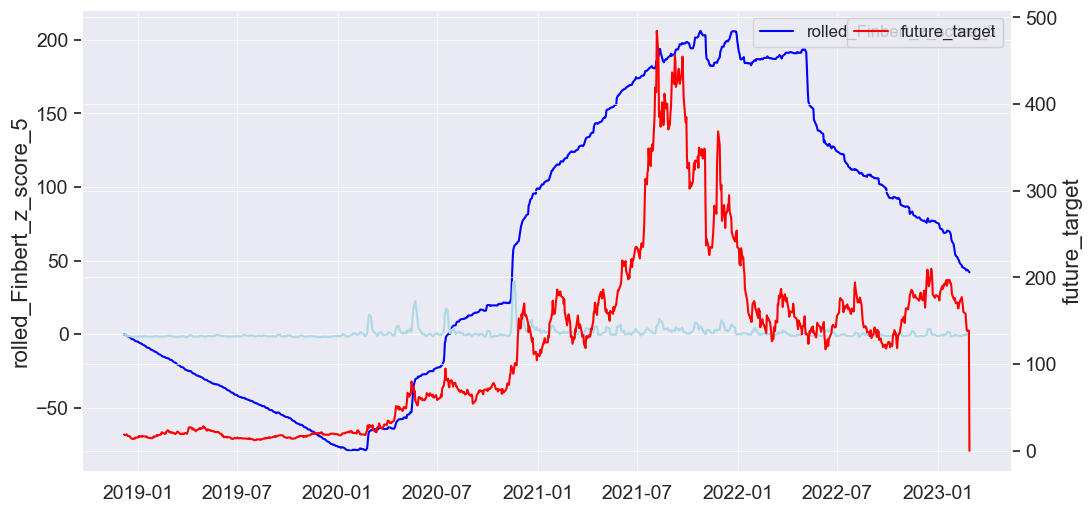

In [682]:
column_name1 = "rolled_Finbert_z_score_371"
column_name2 = "future_target"
columns_name3 ="rolled_Finbert_z_score_5"
# create a figure and an axis object
fig, ax1 = plt.subplots(figsize=(12, 6))
# plot the sentiment column on the primary y-axis
ax1.plot(company_pred_df_senti.datetime, company_pred_df_senti[column_name1], color='blue')
ax1.set_ylabel(column_name1)

ax1.plot(company_pred_df_senti.datetime, company_pred_df_senti[columns_name3], color='lightblue')
ax1.set_ylabel(columns_name3)

# create a secondary y-axis
ax2 = ax1.twinx()

# plot the Close column on the secondary y-axis
ax2.plot(company_pred_df_senti.datetime, company_pred_df_senti[column_name2], color='red')
ax2.set_ylabel(column_name2)

# add a legend
ax1.legend([column_name1], loc='upper left')
ax2.legend([column_name2], loc='upper right')
ax1.legend([columns_name3], loc='upper right')

# show the plot
plt.show()

In [683]:
final_sentiment = ["rolled_Finbert_z_score_499", "Finbert_z_score", "rolled_Finbert_z_score_60"]
#final_sentiment = []

In [684]:
simple_vars = ["datetime",'open','low','high','volume', "future_target"] + final_sentiment
simple_model = ['open','low','high','volume'] + lagged_vars + techni_vars + final_sentiment
company_pred_df_senti = company_pred_df_senti[simple_vars+lagged_vars + techni_vars]

In [685]:
techni_vars

['mean2w', 'std2w', 'std1w']

In [686]:
simple_model

['open',
 'low',
 'high',
 'volume',
 'lag_0',
 'lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_7',
 'lag_8',
 'lag_9',
 'lag_10',
 'mean2w',
 'std2w',
 'std1w',
 'rolled_Finbert_z_score_499',
 'Finbert_z_score',
 'rolled_Finbert_z_score_60']

In [687]:
#xgboost_test = {'xgboost': {'alpha_estimation_method':'Lasso', "alpha": 0.0}}
xgboost_test = {'xgboost': {'alpha_estimation_method':'xgboost'}}

In [688]:
company_pred_df_senti = company_pred_df_senti.iloc[:-22:]
company_pred_df_senti

,datetime,open,low,high,volume,future_target,rolled_Finbert_z_score_499,Finbert_z_score,rolled_Finbert_z_score_60,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,mean2w,std2w,std1w
0,2018-12-07 00:00:00+00:00,22.00,18.510,22.7500,12995569.0,18.80,-0.194359,-0.194359,-0.194359,18.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000
1,2018-12-10 00:00:00+00:00,18.90,18.000,19.4388,4233345.0,18.01,-0.462113,-0.267754,-0.462113,18.80,18.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000
2,2018-12-11 00:00:00+00:00,20.55,17.990,20.6600,3435271.0,18.68,-0.824879,-0.362766,-0.824879,18.01,18.80,18.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000
3,2018-12-12 00:00:00+00:00,18.55,18.020,19.4800,2590873.0,18.76,-1.110553,-0.285674,-1.110553,18.68,18.01,18.80,18.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000
4,2018-12-13 00:00:00+00:00,19.25,18.680,19.2900,1608629.0,18.32,-1.372511,-0.261958,-1.372511,18.76,18.68,18.01,18.80,18.60,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.322335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,2023-01-20 00:00:00+00:00,190.60,188.520,194.5850,4047181.0,196.94,108.774310,-0.004693,-1.883877,193.98,190.38,197.02,190.69,192.00,188.06,186.64,189.65,183.95,180.35,173.51,189.272,4.822887,2.745374
1037,2023-01-23 00:00:00+00:00,192.61,192.210,198.8600,2907292.0,196.76,108.356182,-0.368384,-2.314396,196.94,193.98,190.38,197.02,190.69,192.00,188.06,186.64,189.65,183.95,180.35,190.931,4.229729,3.226022
1038,2023-01-24 00:00:00+00:00,195.83,193.215,197.0600,1851328.0,193.07,107.394391,-0.448691,-2.544896,196.76,196.94,193.98,190.38,197.02,190.69,192.00,188.06,186.64,189.65,183.95,192.212,3.798373,2.886396
1039,2023-01-25 00:00:00+00:00,194.33,189.750,194.9600,2288175.0,193.24,106.230846,-0.276981,-2.590419,193.07,196.76,196.94,193.98,190.38,197.02,190.69,192.00,188.06,186.64,189.65,192.554,3.694612,2.737495


In [689]:
from class_backtester import Backtester as bk 
backtester = bk(df = company_pred_df_senti, 
                params = None,
                modeling_features = simple_model,
                rolling_frw = '1D',
                look_back_prm = 252, 
                configurations= xgboost_test, 
                col_to_pred = 'future_target',
                days_avoid_bias = 0)

backtester.run_backtest()

100%|██████████| 1258/1258 [00:50<00:00, 24.99it/s]


In [690]:
resutls_df = backtester.dict_all_predictions["xgboost"][["datetime", "future_target","future_target_pred"]]

In [691]:
resutls_df['y_test'] = (resutls_df['future_target'] > resutls_df['future_target'].shift()).astype(int)
resutls_df['y_test'] = resutls_df['y_test'].fillna(0)
resutls_df['y_pred'] = (resutls_df['future_target_pred'] > resutls_df['future_target_pred'].shift()).astype(int)
resutls_df['y_pred'] = resutls_df['y_pred'].fillna(0)
resutls_df = resutls_df.set_index("datetime")

In [692]:
from utils import model_evaluate

              precision    recall  f1-score   support

           0       0.48      0.51      0.49       433
           1       0.48      0.44      0.46       433

    accuracy                           0.48       866
   macro avg       0.48      0.48      0.48       866
weighted avg       0.48      0.48      0.48       866



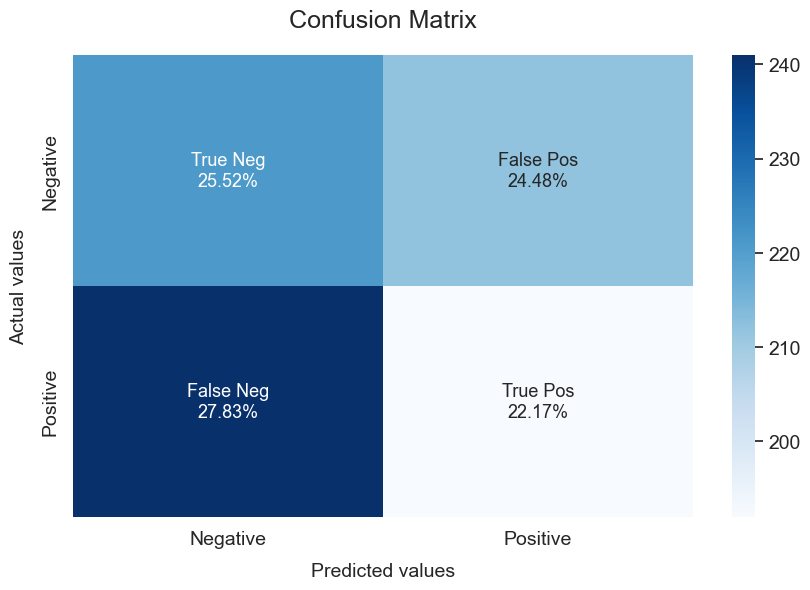

In [649]:
model_evaluate(resutls_df["y_test"], resutls_df["y_pred"]) # without S = 50

411.7604713726904


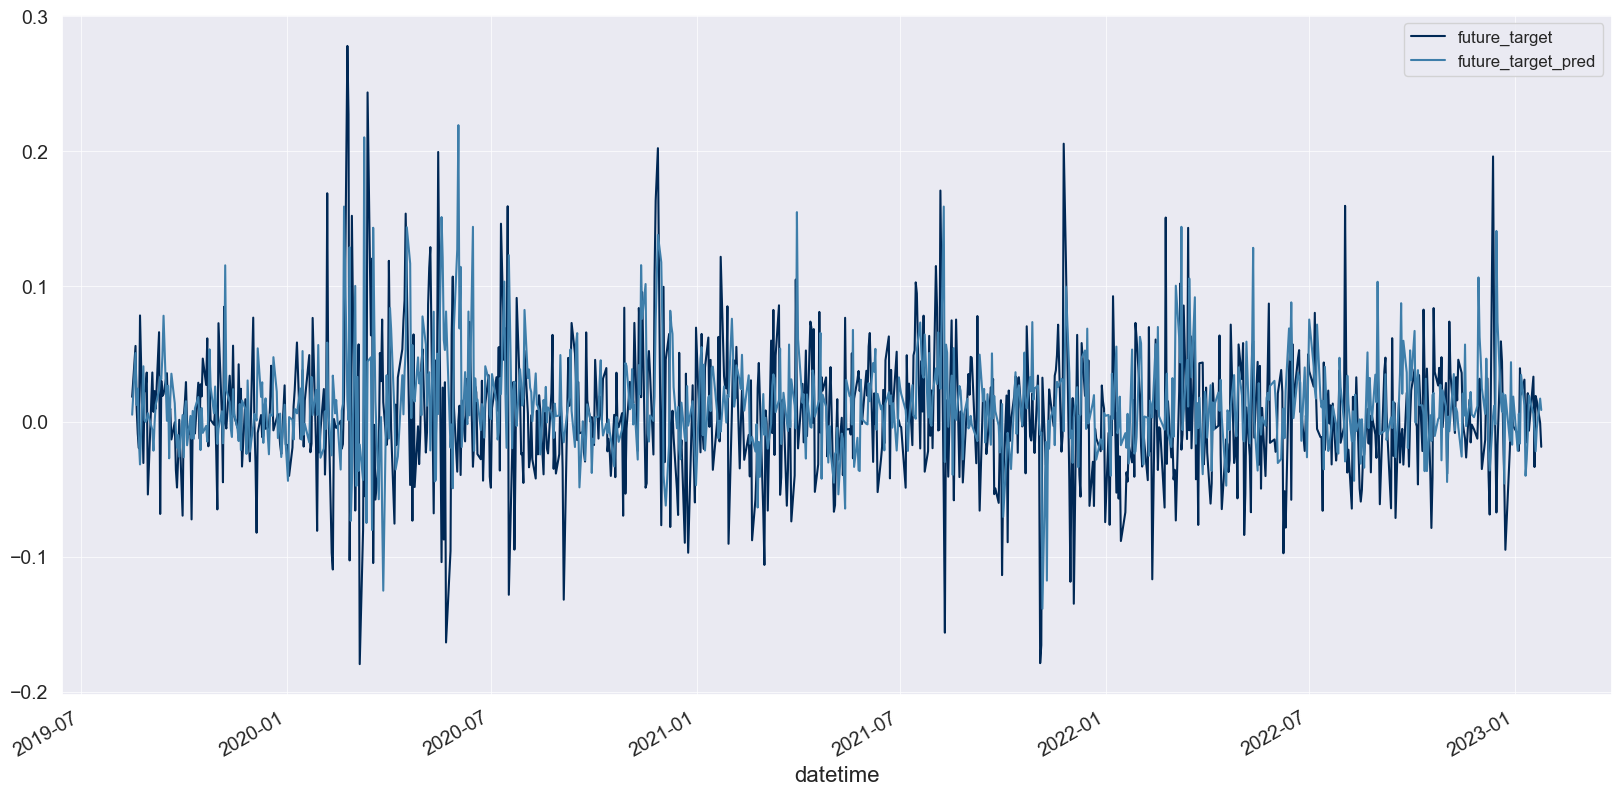

In [650]:
resutls_df.iloc[:,:2].plot(figsize = (20,10))
from sklearn.metrics import mean_absolute_percentage_error
result = mean_absolute_percentage_error(resutls_df.iloc[:,:2]["future_target"], resutls_df.iloc[:,:2]["future_target_pred"])
print(result*100) # without sentiment = 384.8074643280434

              precision    recall  f1-score   support

           0       0.45      0.46      0.46       296
           1       0.45      0.45      0.45       298

    accuracy                           0.45       594
   macro avg       0.45      0.45      0.45       594
weighted avg       0.45      0.45      0.45       594



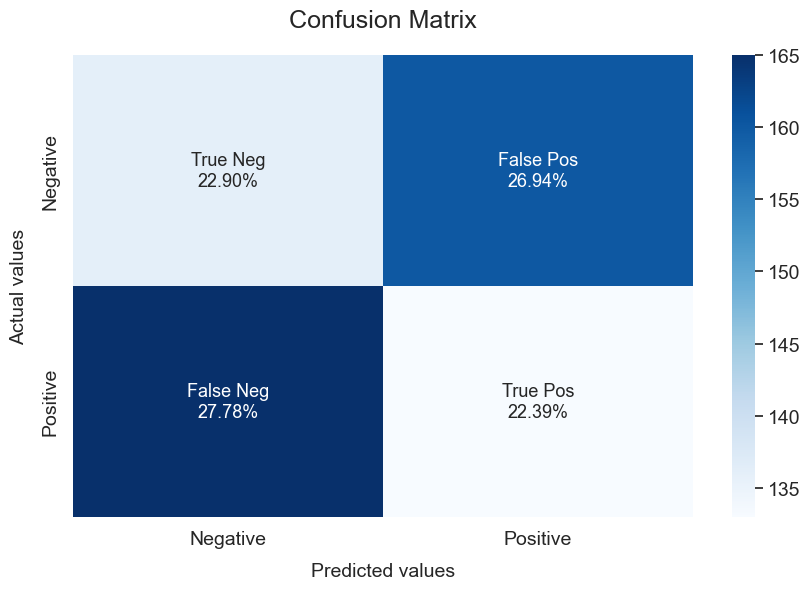

In [526]:
model_evaluate(resutls_df["y_test"], resutls_df["y_pred"]) # 49 or 48 

              precision    recall  f1-score   support

           0       0.49      0.50      0.49       296
           1       0.49      0.48      0.48       298

    accuracy                           0.49       594
   macro avg       0.49      0.49      0.49       594
weighted avg       0.49      0.49      0.49       594



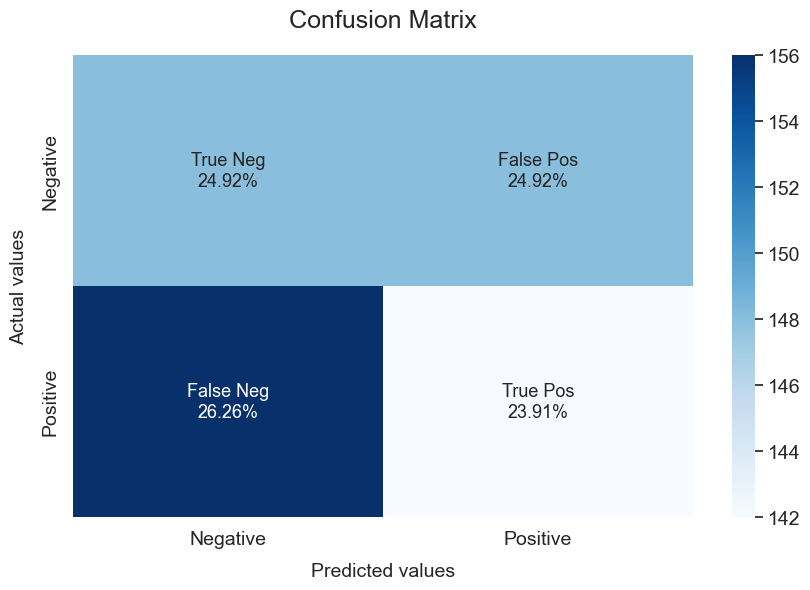

In [556]:
model_evaluate(resutls_df["y_test"], resutls_df["y_pred"]) # 49 or

19.23530120657021


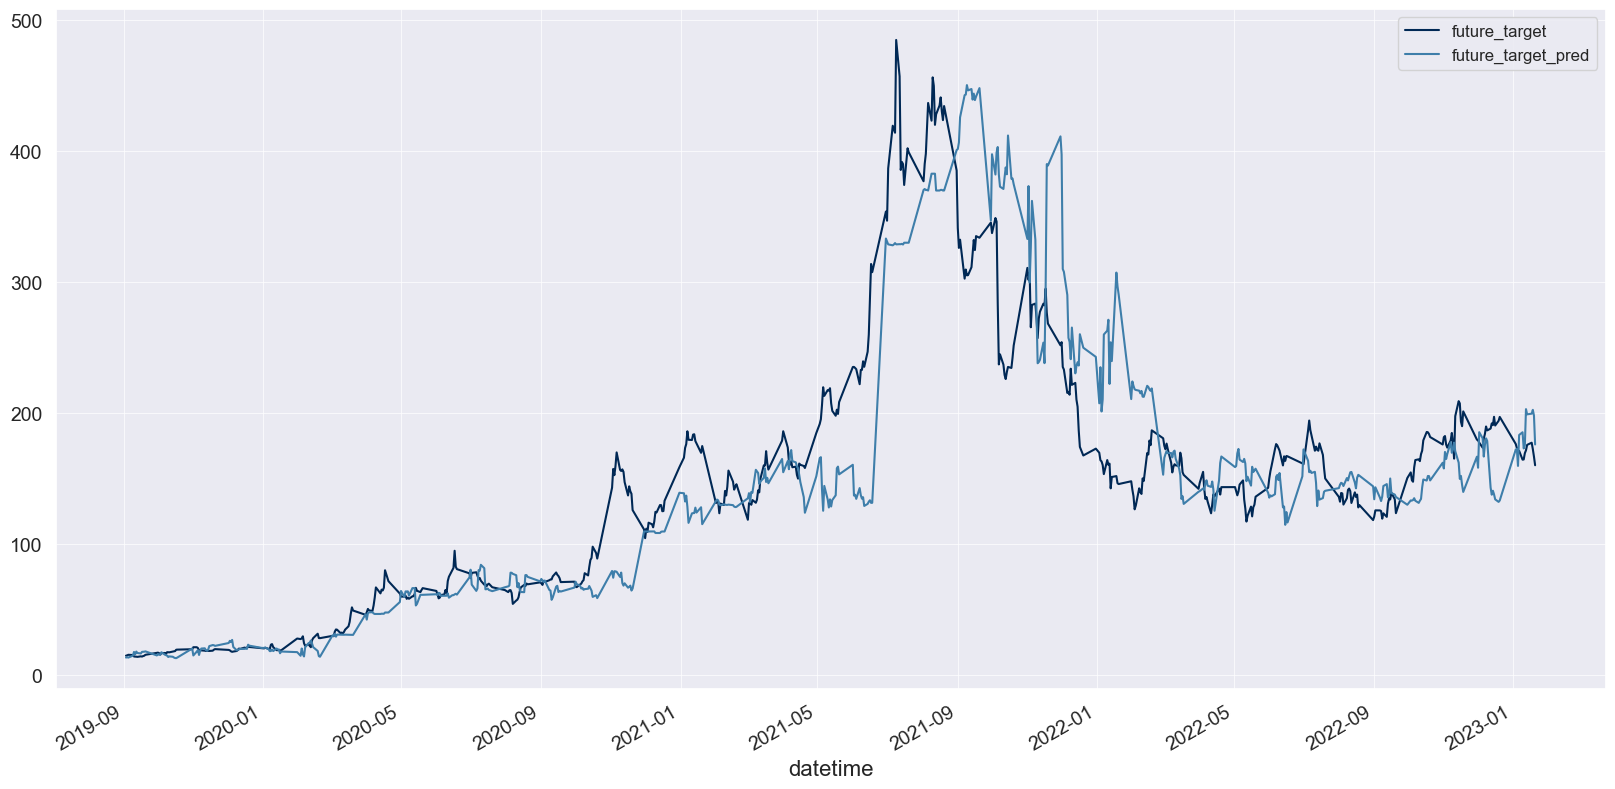

In [527]:
resutls_df.iloc[:,:2].plot(figsize = (20,10))
from sklearn.metrics import mean_absolute_percentage_error
result = mean_absolute_percentage_error(resutls_df.iloc[:,:2]["future_target"], resutls_df.iloc[:,:2]["future_target_pred"])
print(result*100) # 21 days ahead w sentiment = 10.187677796118825

15.876769382077782


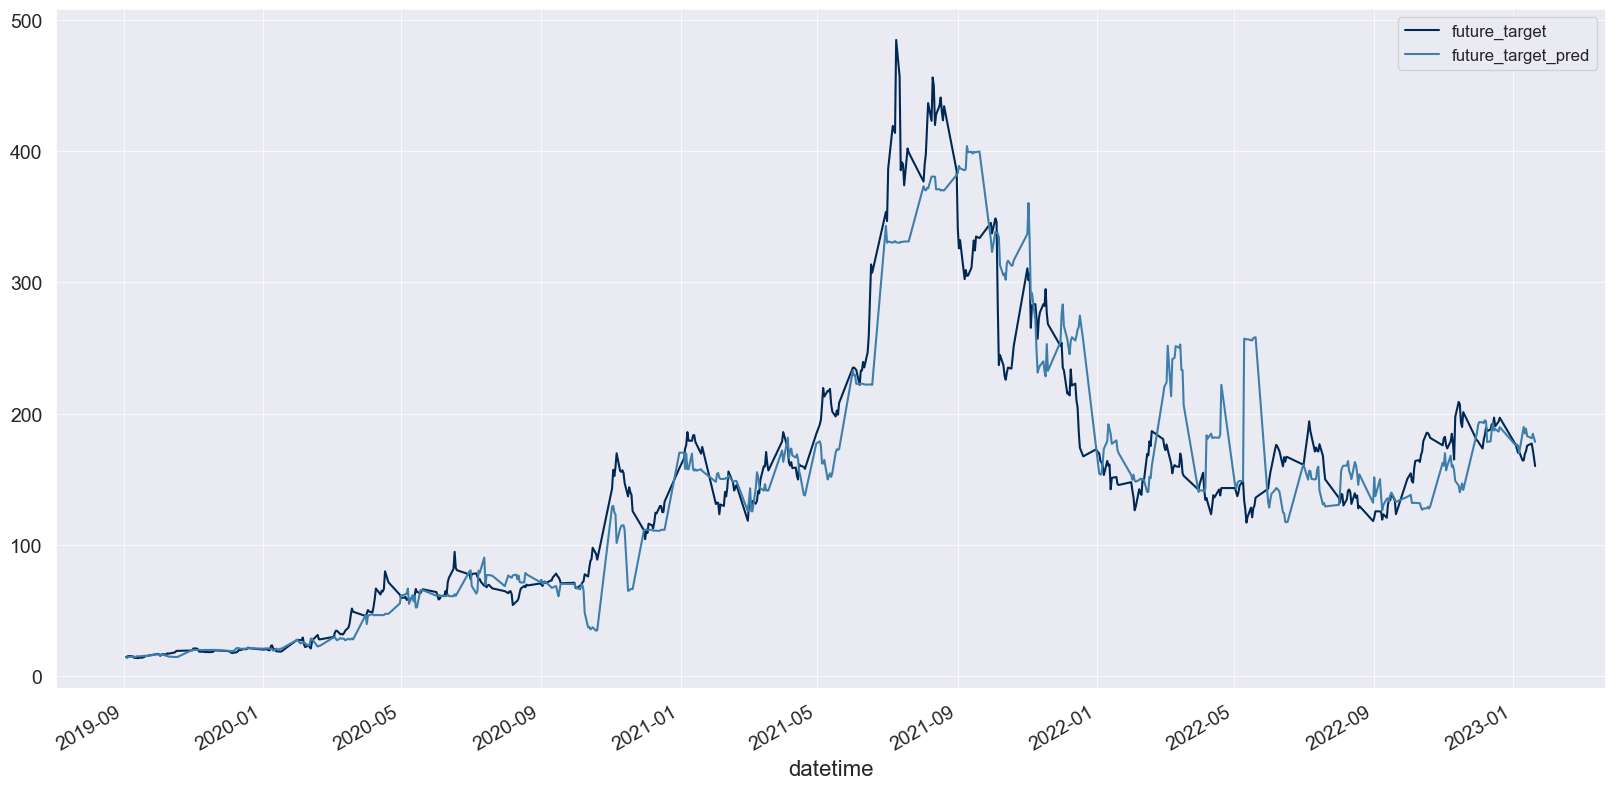

In [555]:
resutls_df.iloc[:,:2].plot(figsize = (20,10))
from sklearn.metrics import mean_absolute_percentage_error
result = mean_absolute_percentage_error(resutls_df.iloc[:,:2]["future_target"], resutls_df.iloc[:,:2]["future_target_pred"])
print(result*100) # 18.64, 18.17

4.994495147669574


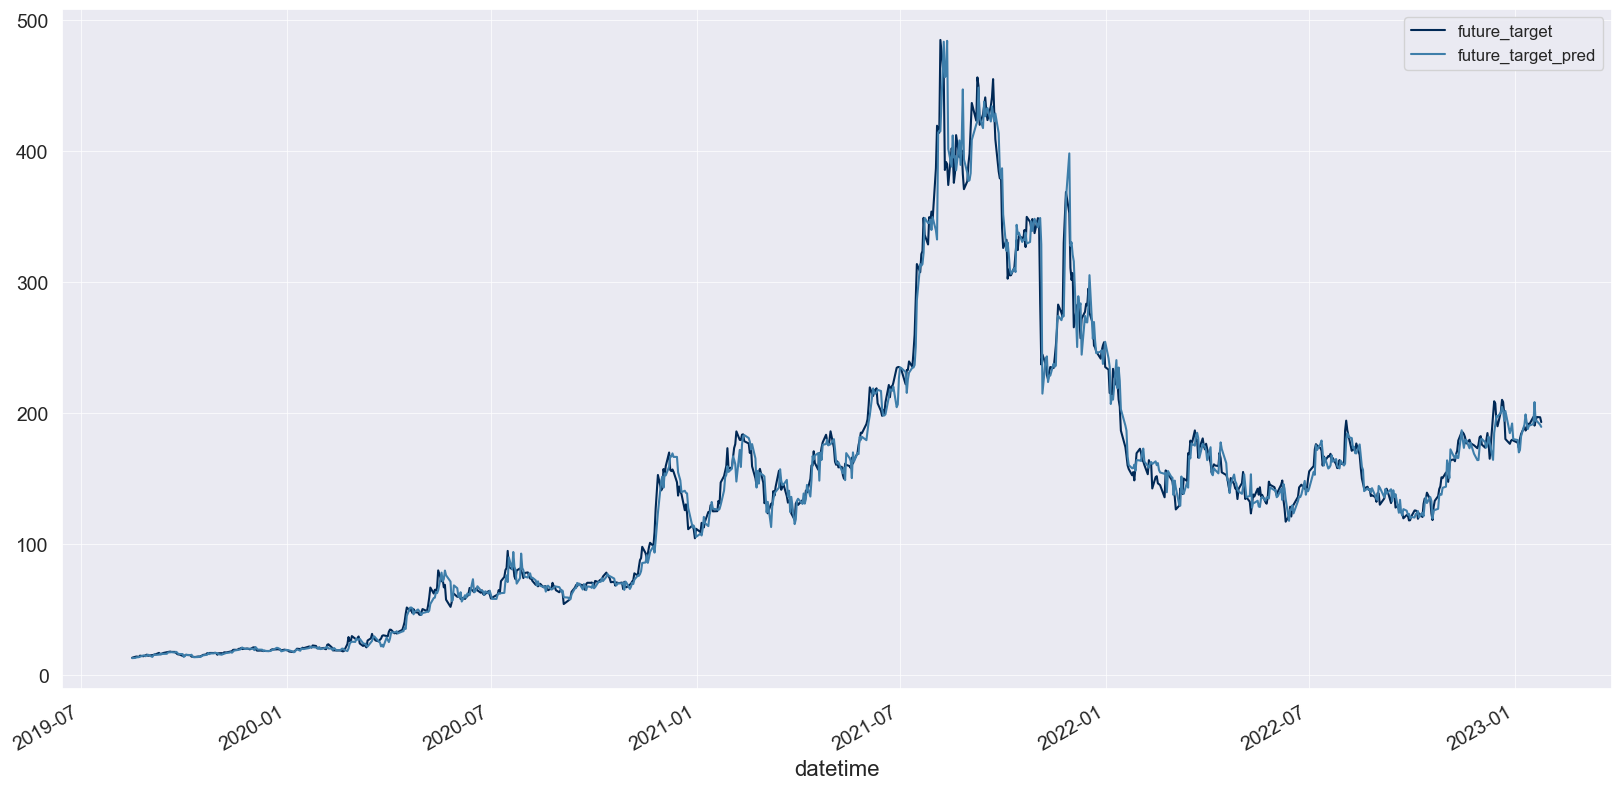

In [576]:
resutls_df.iloc[:,:2].plot(figsize = (20,10))
from sklearn.metrics import mean_absolute_percentage_error
result = mean_absolute_percentage_error(resutls_df.iloc[:,:2]["future_target"], resutls_df.iloc[:,:2]["future_target_pred"])
print(result*100) # 4.271

5.029157815005682


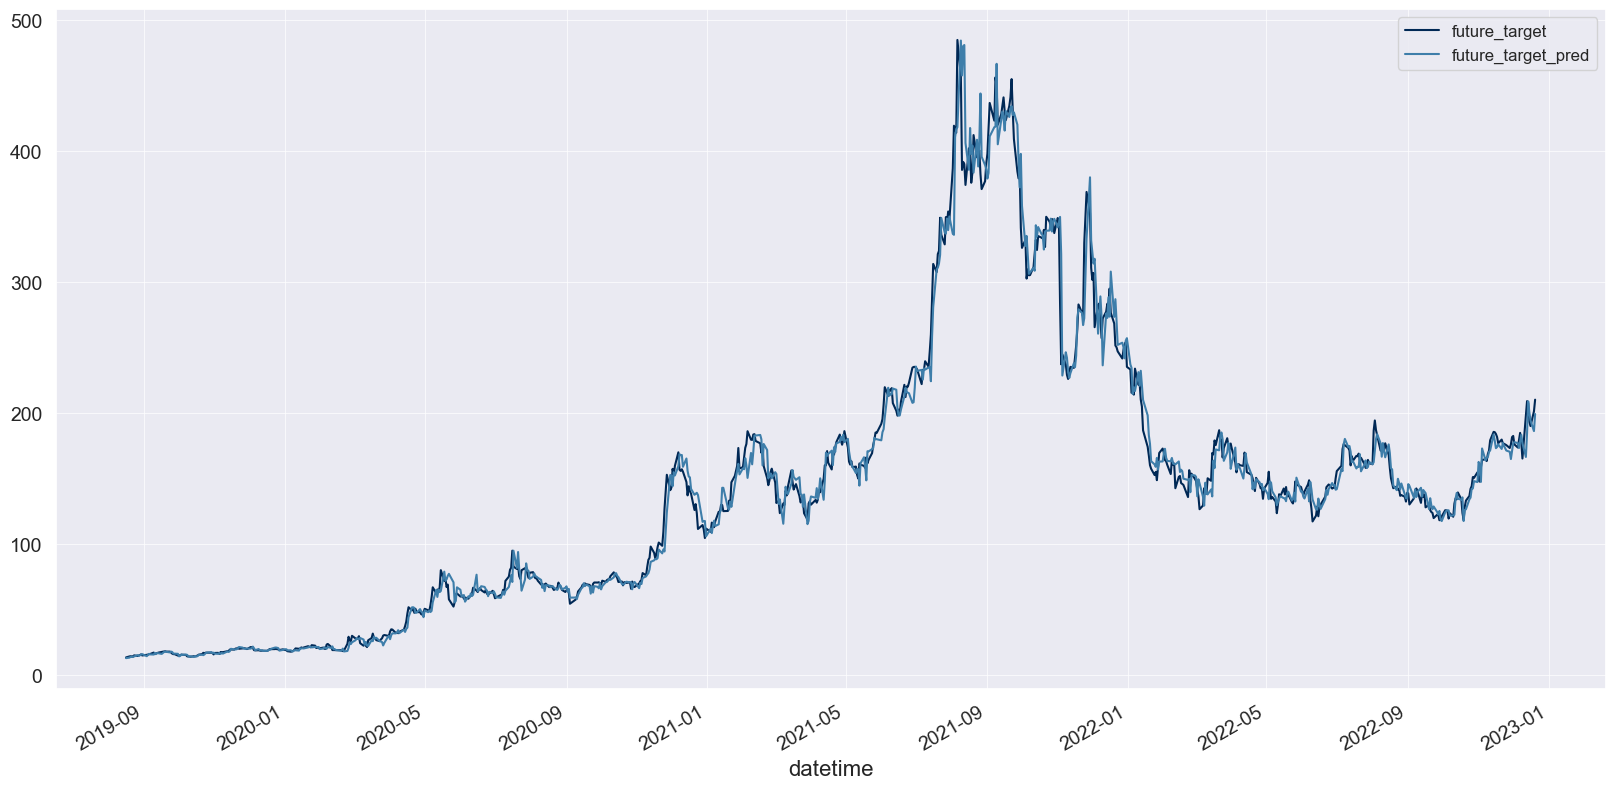

In [589]:
resutls_df.iloc[:,:2].plot(figsize = (20,10))
from sklearn.metrics import mean_absolute_percentage_error
result = mean_absolute_percentage_error(resutls_df.iloc[:,:2]["future_target"], resutls_df.iloc[:,:2]["future_target_pred"])
print(result*100) # 4.271

              precision    recall  f1-score   support

           0       0.50      0.49      0.50       431
           1       0.51      0.52      0.52       435

    accuracy                           0.51       866
   macro avg       0.51      0.51      0.51       866
weighted avg       0.51      0.51      0.51       866



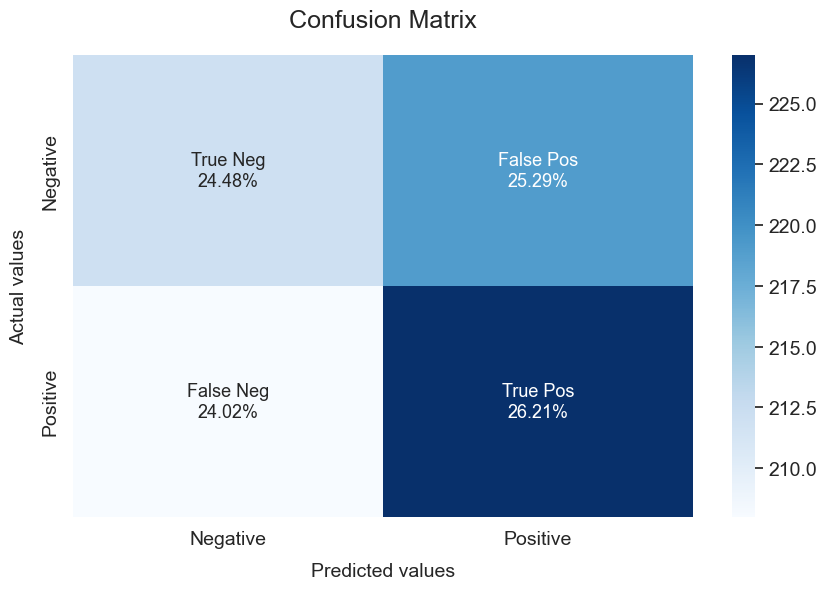

In [578]:
model_evaluate(resutls_df["y_test"], resutls_df["y_pred"]) # 49 or 48 

              precision    recall  f1-score   support

           0       0.49      0.48      0.48       419
           1       0.50      0.50      0.50       425

    accuracy                           0.49       844
   macro avg       0.49      0.49      0.49       844
weighted avg       0.49      0.49      0.49       844



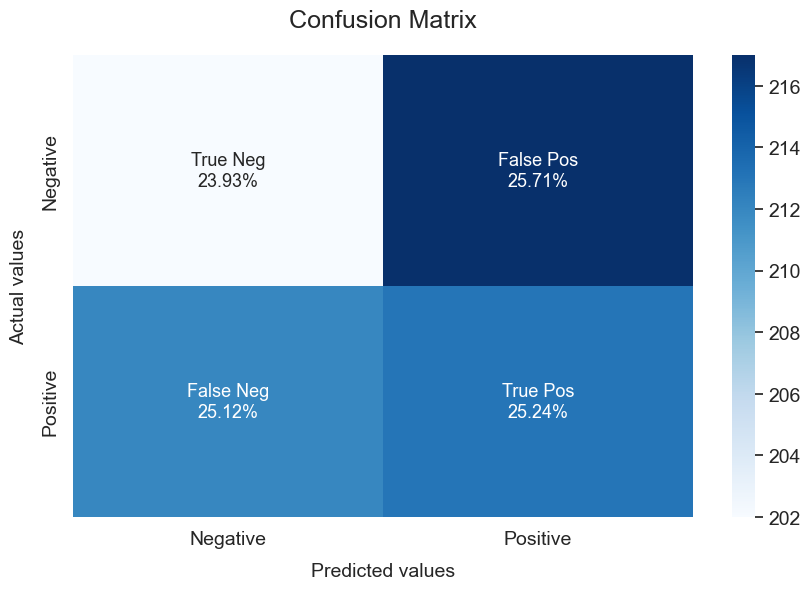

In [590]:
model_evaluate(resutls_df["y_test"], resutls_df["y_pred"]) # 49 or